In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset=pd.read_csv(r"C:\Users\Administrator\datasets\zomato.csv")

In [2]:
dataset.head(10)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Buffet
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,NaN
9,things tend to get smokey due to the sizzlers...,service was sluggish as they took too long to...,('Rated 4.0','RATED\n Amazing cafe,\nTop floor,no outdoor seating.\nFood is delicious,though the quantity is okayish.\nI ordered 6 ...,a nice place to give a try.'),('Rated 1.0','RATED\n Located opposite to wildcraft store...,we had nachos cheese salsa which was okay. We...,it turned out worse than the garlic bread. Th...,parking facility I could not locate. Staff ca...


In [3]:
dataset.fillna(method="ffill",inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8508\1774490461.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="ffill",inplace=True)


In [4]:
df=pd.DataFrame(dataset)

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    
    df[i]=le.fit_transform(df[i])

In [6]:
for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    min_range=q1-(1.5*IQR)
    max_range=q3+(1.5*IQR)
    new_df=df[df[i]<=max_range]

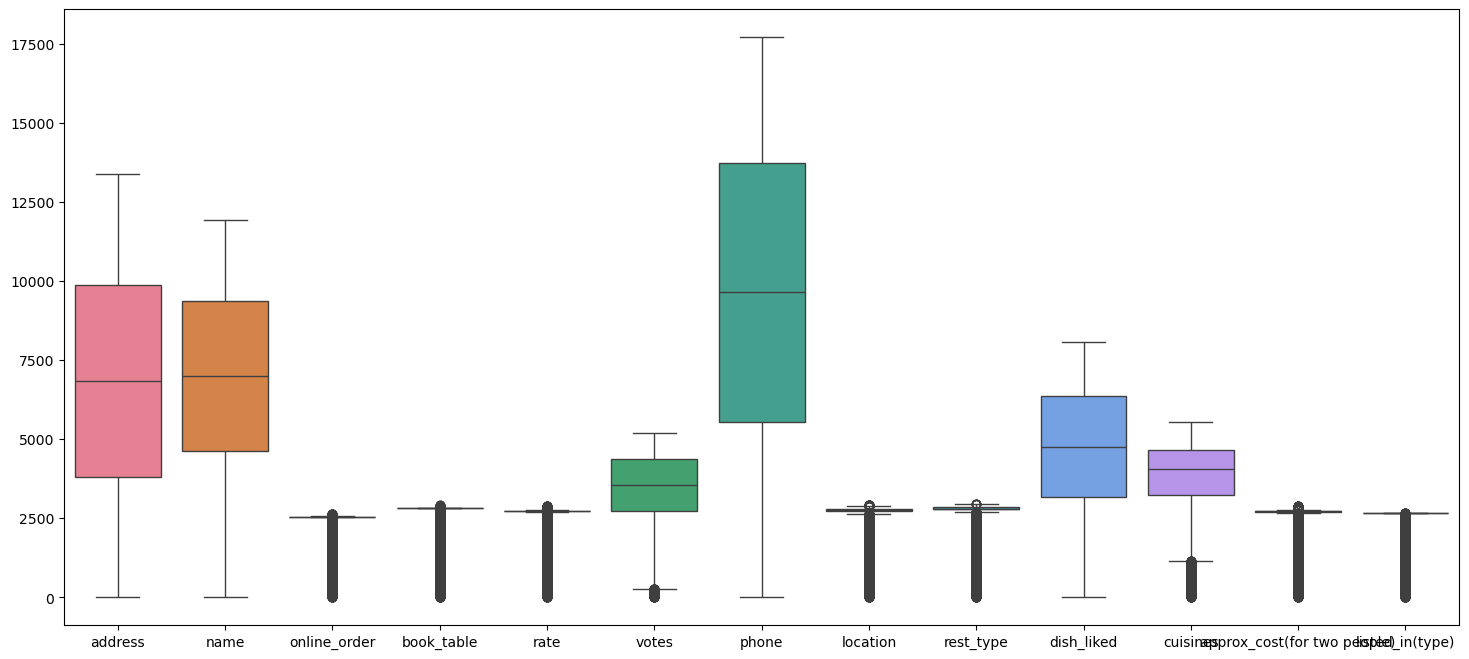

In [7]:
plt.figure(figsize=(18,8))
sns.boxplot(data=new_df) 
plt.show()

In [8]:
new_df.describe()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000
mean,6836.926393,6940.423473,2435.765698,2699.959358,2602.238537,3531.779288,9583.576274,2654.581934,2703.547707,4643.919310,3910.901755,2606.793274,2527.177493
std,3659.298806,2917.517941,418.295812,428.407362,446.968339,1001.356323,4841.065005,431.617086,450.090198,2065.431761,1070.732401,419.436146,458.242924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3798.000000,4614.000000,2539.000000,2809.000000,2712.000000,2733.000000,5541.000000,2728.000000,2788.000000,3164.000000,3241.000000,2704.000000,2659.000000
50%,6849.000000,6990.000000,2549.000000,2809.000000,2720.000000,3556.000000,9655.000000,2759.000000,2802.000000,4751.000000,4049.000000,2713.000000,2659.000000
75%,9885.000000,9378.000000,2549.000000,2809.000000,2727.000000,4375.000000,13735.250000,2784.000000,2854.000000,6361.000000,4643.000000,2726.000000,2662.000000
max,13395.000000,11913.000000,2638.000000,2901.000000,2876.000000,5194.000000,17711.000000,2919.000000,2960.000000,8066.000000,5552.000000,2878.000000,2666.000000


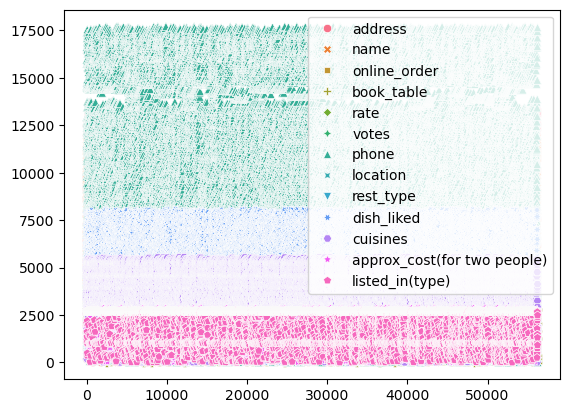

In [9]:
sns.scatterplot(data=new_df)
plt.legend(loc=1)
plt.show()